In [42]:
import numpy as np
from QPGC import QPGenericConstraints
import matplotlib.pyplot as plt

First we generate 50 points for each class, with k = 1. Then we create the matrices that are involved in the problem:

maximize $ f(\alpha ) = \sum_{i=1}^m \alpha_i - \frac{1}{2} \alpha^T(YX^TXY) \alpha$

subject to $\sum_{i=1}^m y_i \alpha_i = 0, \quad 0 \leq \alpha_i \leq K $ 

That can also be written as 

minimize  $ f(x) = \frac{1}{2} x^T Gx + g^T x$

subject to $A^Tx = b, \quad C^T x \leq d$ .

In [43]:
def generateDataset(num_points_class1,num_points_class2, separable = True):
    if separable:
        class1 = np.array(np.random.multivariate_normal([0.,0.], [[1,-0.9],[-0.9,1]], num_points_class1))
        class2 = np.array(np.random.multivariate_normal([3.,6.], [[1,0],[0,1]], num_points_class2))
    else:
        class1 = np.array(np.random.multivariate_normal([0.,0.], [[1,-0.9],[-0.9,1]], num_points_class1))
        class2 = np.array(np.random.multivariate_normal([1.,2.], [[1,0],[0,1]], num_points_class2))


    nd = np.concatenate((class1, class2), axis=0)
    labels = np.concatenate((-np.ones(num_points_class1),np.ones(num_points_class2)), axis=0)

    return nd,labels

In [44]:
def generateMatrices(x, y, k,class_size):

    total_points = class_size * 2 # Given in the exercise

    # Initial vector/matrix variables
    A = y.reshape(total_points,1) # Due to the constraint A.T * x = b
    b = np.zeros(1) # b is in R^{p} in the problem description. b is all zeros in A.T * x = b
    
    C = np.concatenate((np.diag(np.ones(total_points)), np.diag(-np.ones(total_points)))).T

     # d is in R^m in the problem description, given in the exercise TODO
    d = np.concatenate((np.zeros(total_points), (-1)*k*np.ones(total_points)))
    
    G = np.diag(y) @ x @ np.transpose(x) @ np.diag(y) # Given in the exercise
    g = -np.ones(total_points) # Given by the exercise: Normal Distribution


    return A, b, C, d, G, g

# Experiment 1: 2 points for each class

(4, 2)


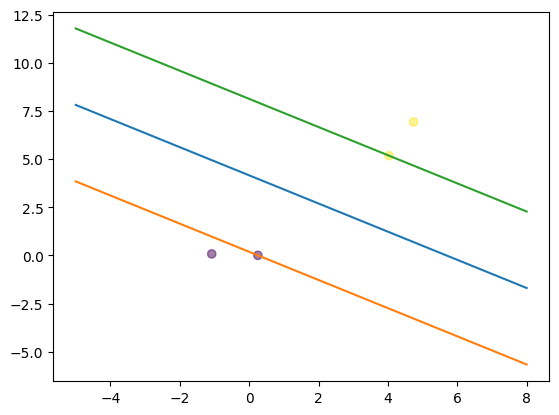

In [53]:
# Generate dataset
X, y = generateDataset(2,2)
print(X.shape)

# Generate matrices
A, b, C, d, G, g = generateMatrices(X, y, 1,2)

# Compute alpha 
alpha = QPGenericConstraints(G, g, A, C, b, d)

# Compute hyperplane
w = (alpha * y)[:,None] * X
w = np.sum(w, axis=0)
index = np.argmax(alpha)
b = y[index] -(w.T @ X[index])

# Plot points, margins and hyperplane
linespace = np.linspace(-5, 5, 100)

plt.scatter(X[:,0], X[:,1],c=y, alpha=0.5)
a = -w[0] / w[1]
xx = np.linspace(-5, 8)
yy = (a * xx) - ((b) / w[1])
yy_max = (a * xx) - ((b+1) / w[1])
yy_min = (a * xx) - ((b-1) / w[1])
plt.plot(xx,yy)
plt.plot(xx,yy_max)
plt.plot(xx,yy_min)

Using a small and separable dataset of only two points for each class, we can observe that the hyperplanes splits the two classes correctly. Here we set K = 1.

# Experiment 2: 100 points for each class

(200, 2)


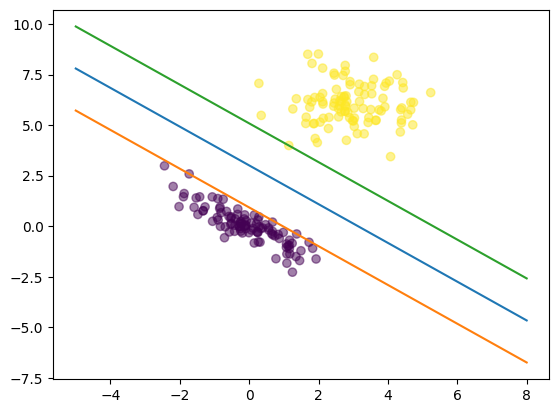

In [54]:
# Generate dataset
X, y = generateDataset(100,100)
print(X.shape)

# Generate matrices
A, b, C, d, G, g = generateMatrices(X, y, 1,100)

# Compute alpha 
alpha = QPGenericConstraints(G, g, A, C, b, d)

# Compute hyperplane
w = (alpha * y)[:,None] * X
w = np.sum(w, axis=0)
index = np.argmax(alpha)
b = y[index] -(w.T @ X[index])

# Plot points, margins and hyperplane
linespace = np.linspace(-5, 5, 100)

plt.scatter(X[:,0], X[:,1],c=y, alpha=0.5)
a = -w[0] / w[1]
xx = np.linspace(-5, 8)
yy = (a * xx) - ((b) / w[1])
yy_max = (a * xx) - ((b+1) / w[1])
yy_min = (a * xx) - ((b-1) / w[1])
plt.plot(xx,yy)
plt.plot(xx,yy_max)
plt.plot(xx,yy_min)

In this case we augmented the quantity of of points of each class to 100. Since the dataset is still separable we can observe that the hyperplanes divide correctly the points of the two classes.

# Experiment 3: different values of K and check stability

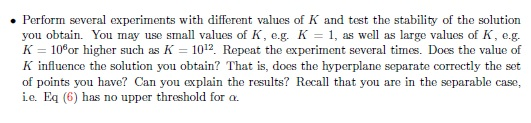

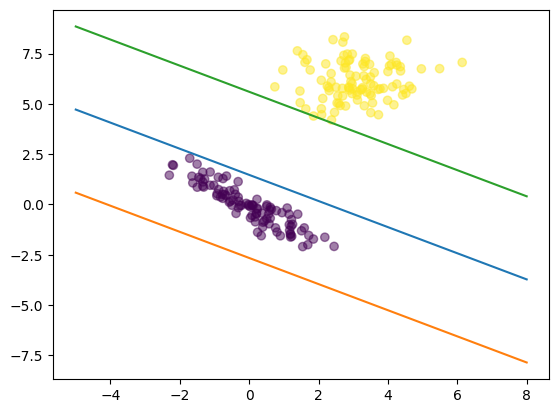

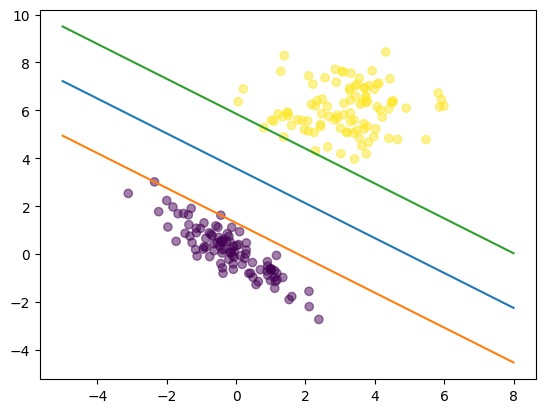

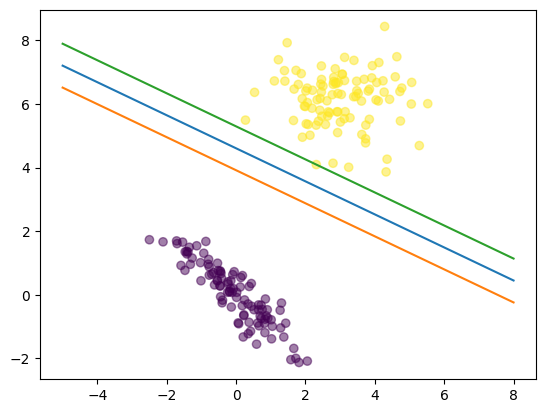

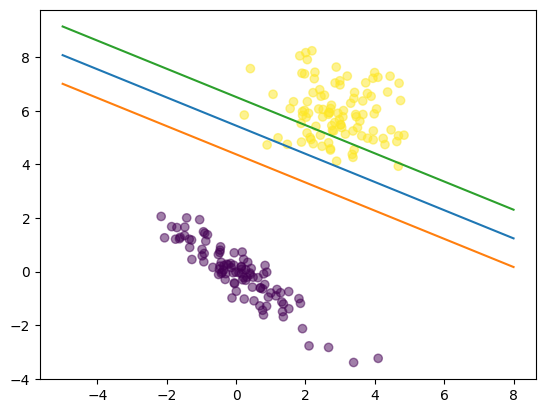

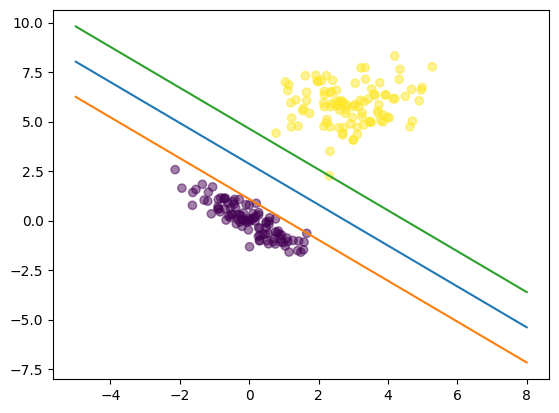

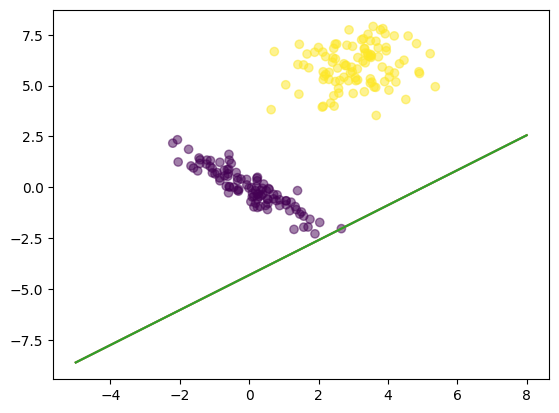

In [50]:
for K in [1e-3, 1,1e2, 1e3, 1e6, 1e12]:
    # Generate dataset
    X, y = generateDataset(100,100)

    # Generate matrices
    A, b, C, d, G, g = generateMatrices(X, y, K,100)

    # Compute alpha 
    alpha = QPGenericConstraints(G, g, A, C, b, d)

    # Compute hyperplane
    w = (alpha * y)[:,None] * X
    w = np.sum(w, axis=0)
    index = np.argmax(alpha)
    b = y[index] -(w.T @ X[index])


    # Plot points, margins and hyperplane
    linespace = np.linspace(-5, 5, 100)

    plt.scatter(X[:,0], X[:,1],c=y, alpha=0.5)
    a = -w[0] / w[1]
    xx = np.linspace(-5, 8)
    yy = (a * xx) - ((b) / w[1])
    yy_max = (a * xx) - ((b+1) / w[1])
    yy_min = (a * xx) - ((b-1) / w[1])
    plt.plot(xx,yy)
    plt.plot(xx,yy_max)
    plt.plot(xx,yy_min)
    plt.show()

In the above plots we can observe the behavior of the implementation: we can conclude that for $ K < 1 $ the hyperplane still divides the classes but the margins are not as accurate, while for $ k> 1$ the hyperplane it's not as accurate in the class separation.

Furthermore we couldn't increase the value of K up to $10^8$ since the implementations couldn't converge to a solution.

# Experiment 4: non-separable case, different values of K and check stability

<img src="data:image/png;base64,

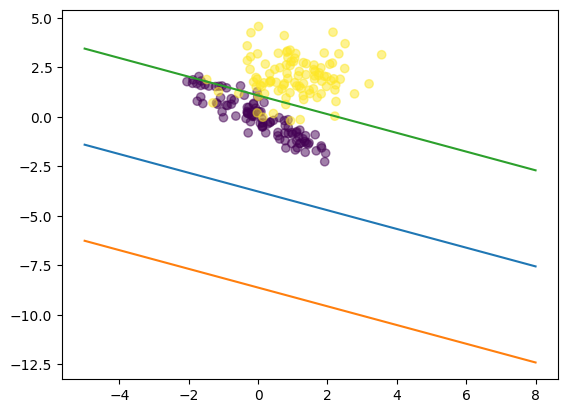

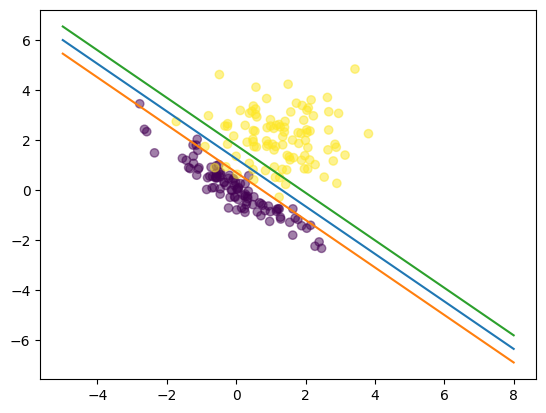

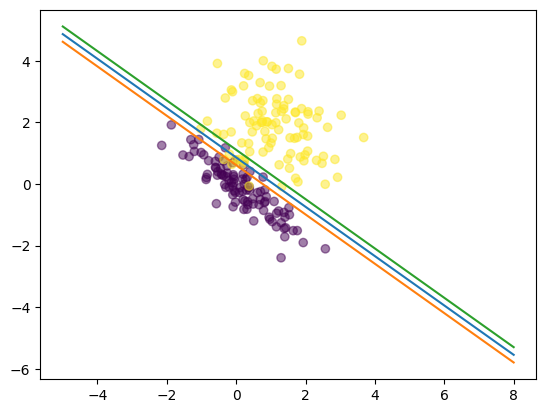

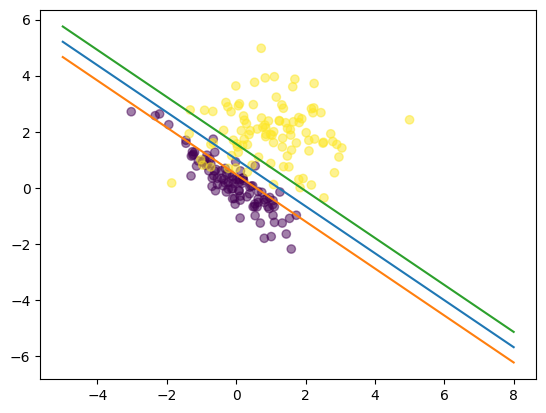

LinAlgError: Singular matrix

In [51]:
for K in [1e-3, 1,1e2, 1e3, 1e6, 1e12]:
    # Generate dataset
    X, y = generateDataset(100,100, separable=False)

    # Generate matrices
    A, b, C, d, G, g = generateMatrices(X, y, K,100)

    # Compute alpha 
    alpha = QPGenericConstraints(G, g, A, C, b, d)

    # Compute hyperplane
    w = (alpha * y)[:,None] * X
    w = np.sum(w, axis=0)
    index = np.argmax(alpha)
    b = y[index] -(w.T @ X[index])


    # Plot points, margins and hyperplane
    linespace = np.linspace(-5, 5, 100)

    plt.scatter(X[:,0], X[:,1],c=y, alpha=0.5)
    a = -w[0] / w[1]
    xx = np.linspace(-5, 8)
    yy = (a * xx) - ((b) / w[1])
    yy_max = (a * xx) - ((b+1) / w[1])
    yy_min = (a * xx) - ((b-1) / w[1])
    plt.plot(xx,yy)
    plt.plot(xx,yy_max)
    plt.plot(xx,yy_min)
    plt.show()

We were requested to repeat the previous experiment but with a non-separable dataset. Lower Ks fail to work properly as most of the samples lay in the margins. Higher Ks are more suitable in this case, as the hyperplane will seek to lay just as in the middle of both classes as possible. Of course, as it happened before, the highest K values will cause a divergence and make the code crash.

A different result was instead obtained by using non-separable datasets: in general the results were not as satisfying, including some points laying in the margins, but comparing bigger values of K to smaller ones, we realized that with big values will result in a more centered hyperplane.